In [134]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt

class Forex():        
    def load_data(ticker: str, time_frame: str) -> None: # Load dataset.
        params_dic = {
         'host': 'localhost',
         'database': '../algorithmic-trading/data/forex.db'
        }
        with sqlite3.connect(f"{params_dic['database']}") as connection:
            dataset = pd.read_sql_query("SELECT * FROM "+ticker.lower()+"_"+time_frame, connection)
            return dataset

currency_pair = ['AUDCAD']
#currency_pair = ['AUDCAD', 'AUDNZD', 'AUDUSD', 'CADCHF', 'EURAUD', 'EURBRL', 'EURCAD', 'EURCHF', 'EURHUF', 'EURGBP', 'EURJPY', 'EURNZD', 'EURUSD', 'GBPCAD', 'GBPCHF', 'GBPJPY', 'GBPUSD', 'GBPNZD', 'USDCAD', 'USDCHF', 'USDJPY', 'USDMXN', 'USDSGD', 'USDTRY', 'NZDCAD', 'NZDUSD', 'NZDJPY']
for currency in currency_pair:
    #time_frames = ['1d', '1wk', '1mo', '3mo'] # Intervals: “1m”, “2m”, “5m”, “15m”, “30m”, “60m”, “90m”, “1h”, “1d”, “5d”, “1wk”, “1mo”, “3mo”
    time_frames = ['1d']
    for time_frame in time_frames:
        dataset = Forex.load_data(currency, time_frame)
        print(dataset)

                     date      open      high       low     close
0     2003-12-01 00:00:00  0.939950  0.949650  0.937890  0.948880
1     2003-12-02 00:00:00  0.948270  0.952230  0.947050  0.949270
2     2003-12-03 00:00:00  0.949240  0.958940  0.946510  0.958220
3     2003-12-04 00:00:00  0.958120  0.966070  0.955970  0.963950
4     2003-12-05 00:00:00  0.964420  0.964900  0.956280  0.959880
...                   ...       ...       ...       ...       ...
4751  2022-02-28 00:00:00  0.916226  0.921100  0.915590  0.916461
4752  2022-03-01 00:00:00  0.919267  0.922611  0.918750  0.919500
4753  2022-03-02 00:00:00  0.923820  0.926094  0.920294  0.923882
4754  2022-03-03 00:00:00  0.921700  0.928376  0.920203  0.922292
4755  2022-03-07 00:00:00  0.938340  0.941600  0.936220  0.939750

[4756 rows x 5 columns]


<h4>Linear Regression</h4>

R2 Score: 0.992072742914977
Mean Squared: 2.6113615106281833e-05
Intercept: 0.03372097813717645
Slope: [0.96470892]


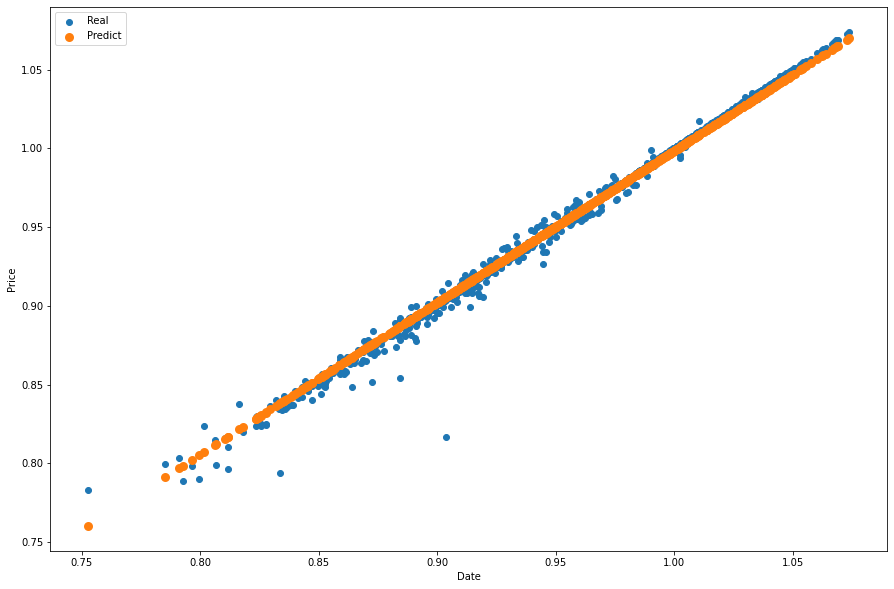

,close,predict,date,difference_predict
2,0.958220,0.949461,2003-12-03 00:00:00,-0.008759
3,0.963950,0.958028,2003-12-04 00:00:00,-0.005922
4,0.959880,0.964106,2003-12-05 00:00:00,0.004226
15,0.976810,0.983091,2003-12-22 00:00:00,0.006281
18,0.971240,0.969932,2003-12-25 00:00:00,-0.001308
...,...,...,...,...
4743,0.909421,0.911199,2022-02-16 00:00:00,0.001778
4744,0.913250,0.914653,2022-02-17 00:00:00,0.001403
4745,0.913000,0.914830,2022-02-18 00:00:00,0.001830
4750,0.917140,0.918340,2022-02-25 00:00:00,0.001200


In [135]:
# Define X and Y
x = np.array(dataset['open']).reshape(-1, 1)
y = dataset['close']

# Split Train and Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=2)

# Model
model = LinearRegression().fit(x_train, y_train)
y_predict = model.predict(x_test)

# Metrics
print(f'R2 Score: {r2_score(y_test, y_predict)}')
print(f'Mean Squared: {mean_squared_error(y_test, y_predict)}')
print(f'Intercept: {model.intercept_}')
print(f'Slope: {model.coef_}')

# Plot actual and predicted values
plt.figure(figsize=(15,10))
plt.scatter(x_test.T[0], y_test)
plt.scatter(x_test.T[0], model.predict(x_test).T, linewidths=3)
plt.legend(['Real', 'Predict'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Real / Predict
df = pd.DataFrame(y_test)
df['predict'] = model.predict(x_test).T
df['date'] = dataset['date']
df['difference_predict'] = df['predict'] - df['close']
df.sort_values(by=['date'])

<h4>Linear Regression - Returns Prediction</h4>

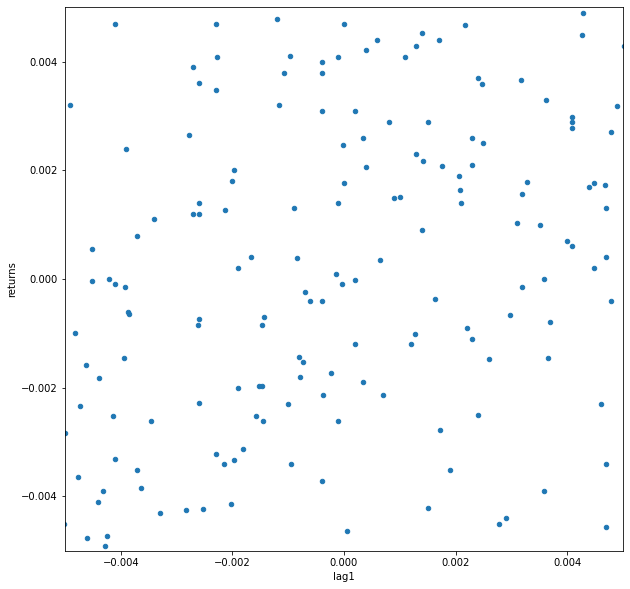

R2 Score: 0.9891163802682527
Mean Squared: 4.093611227397759e-05
Intercept: -0.0002729054151252158
Slope: [0.9946763]


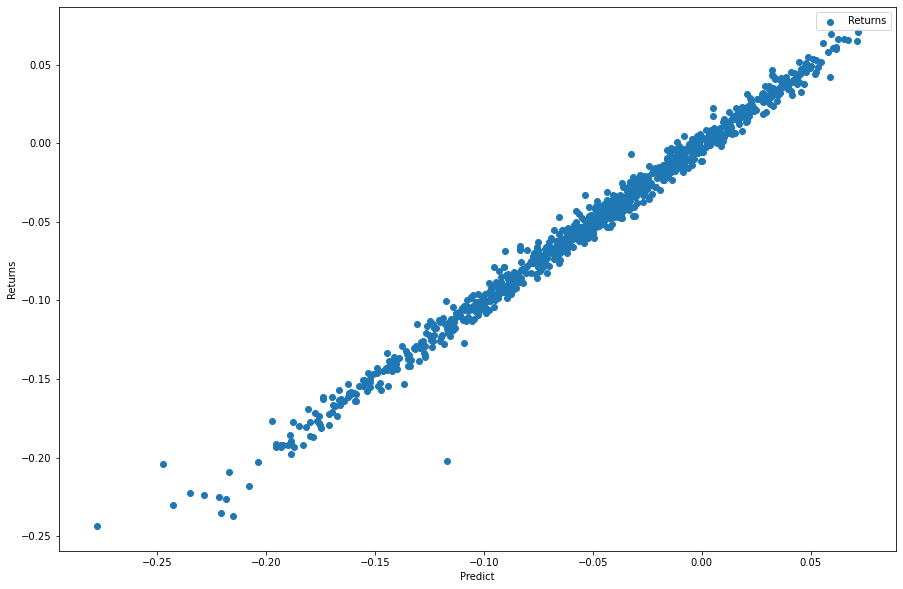

,returns,predict,direction_market,date
3756,-0.033288,-0.036247,-1.0,2018-05-07 00:00:00
1081,-0.114177,-0.119052,-1.0,2008-01-29 00:00:00
1174,-0.028194,-0.020003,-1.0,2008-06-10 00:00:00
2140,0.060342,0.060403,1.0,2012-02-24 00:00:00
1835,0.013508,0.010018,1.0,2010-12-23 00:00:00
...,...,...,...,...
851,-0.091019,-0.093754,-1.0,2007-03-08 00:00:00
4521,-0.038854,-0.040588,-1.0,2021-04-12 00:00:00
877,-0.059113,-0.061184,-1.0,2007-04-13 00:00:00
1066,-0.131727,-0.130993,-1.0,2008-01-08 00:00:00


In [136]:
dataset['returns'] = np.log(dataset['close']).shift(1)
dataset['lag1'] = dataset['returns'].shift(1)
dataset.dropna(inplace=True)

dataset.loc[:, ['close', 'returns', 'lag1']].plot(kind='scatter', x='lag1', y='returns', figsize=(10, 10))
plt.xlim(-0.005, 0.005)
plt.ylim(-0.005, 0.005)
plt.show()

# Define X and Y
x = np.array(dataset['lag1']).reshape(-1, 1)
y = dataset['returns']

# Split Train and Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=2)

# Featuring scaling
scaler = StandardScaler().fit(x_train)

# Model
model = LinearRegression().fit(x_train, y_train)
y_predict = model.predict(x_test)

# Metrics
print(f'R2 Score: {r2_score(y_test, y_predict)}')
print(f'Mean Squared: {mean_squared_error(y_test, y_predict)}')
print(f'Intercept: {model.intercept_}')
print(f'Slope: {model.coef_}')

# Real / Predict
df = pd.DataFrame(y_test)
df['predict'] = model.predict(x_test).T
df['direction_market'] = np.sign(df['predict'])
df['date'] = dataset['date']
df.sort_values(by=['date'])

# Plot
plt.figure(figsize=(15,10))
plt.scatter(df['returns'], df['predict'])
plt.legend(['Returns', 'Predict'])
plt.xlabel('Predict')
plt.ylabel('Returns')
plt.show()
df